In [26]:
import torch
from torch import optim, nn
import numpy as np
from utils.loader import ScatterData, train_test_split_torch,train_test_split_torch_stratify
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor
from models.generator import get_model
from models.training import train
from tqdm.auto import tqdm
import os
from glob import glob

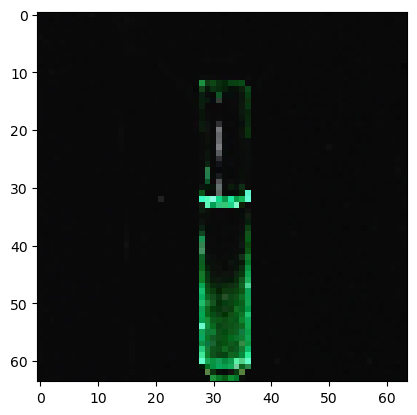

In [48]:
dset=ScatterData(path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\Second Setup\520nm',
                 transform=Compose([ToTensor(),
                                    Resize([64,64],interpolation=InterpolationMode.NEAREST)]),
                 verbose=False)

train_loader,valid_loader=train_test_split_torch(dset,validation_split=0.2,shuffle_dataset=True,batch_size=5)

(x,y)=dset[50]
x=x.permute(1,2,0).numpy()
x=x*127.5+127.5
plt.imshow(x.astype('uint'))

In [49]:
os.chdir(r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\Second Setup\520nm')
lst=glob('*.jpg')
count=0
lst_soluble=[]
for file in lst:
    f=file.split('_')[-2]
    if f=='INSOLUBLE' : count+=1
    if f=='SOLUBLE' : lst_soluble.append(file)
print('total file : ',len(lst))
print('soluble {}% & insoluble {}%'.format(round((len(lst)-count)/len(lst)*100,3),round(count/len(lst)*100),3))

total file :  72
soluble 29.167% & insoluble 71%


In [50]:
model_resnet=get_model('resnet18',feat=64)

In [51]:
lr = 1e-3
history = train(model=model_resnet,
      optimizer=torch.optim.Adam(model_resnet.parameters(), lr=lr),
      loss_fn=nn.BCELoss(),
      train_loader=train_loader,
      valid_loader=valid_loader,
      epochs=10,
      device='cpu',
      verbose=True,
      path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\weights',
      fname = 'solubility_lr_'+str(lr),
      update=1)

 10%|█         | 1/10 [00:12<01:52, 12.45s/it]

epoch: 0,train loss: 1.2886079333839007, valid loss: 0.00022855134011479095, train acc: 1.0, valid acc: 1.0


 20%|██        | 2/10 [00:26<01:45, 13.16s/it]

epoch: 1,train loss: 0.0031313109998336586, valid loss: 2.8622519494092558e-05, train acc: 1.0, valid acc: 1.0


 30%|███       | 3/10 [00:40<01:35, 13.60s/it]

epoch: 2,train loss: 0.0007704955000917835, valid loss: 3.6060856700714794e-06, train acc: 1.0, valid acc: 1.0


 40%|████      | 4/10 [00:53<01:21, 13.59s/it]

epoch: 3,train loss: 0.00042055123265072325, valid loss: 2.3126625023905945e-06, train acc: 1.0, valid acc: 1.0


 50%|█████     | 5/10 [01:07<01:07, 13.55s/it]

epoch: 4,train loss: 0.00016604965162514418, valid loss: 1.436472842897274e-06, train acc: 1.0, valid acc: 1.0


 60%|██████    | 6/10 [01:20<00:53, 13.47s/it]

epoch: 5,train loss: 0.00018764642672408627, valid loss: 6.616116934310412e-07, train acc: 1.0, valid acc: 1.0


 70%|███████   | 7/10 [01:33<00:40, 13.43s/it]

epoch: 6,train loss: 9.755742040340465e-05, valid loss: 5.960465472298893e-07, train acc: 1.0, valid acc: 1.0


 80%|████████  | 8/10 [01:47<00:27, 13.62s/it]

epoch: 7,train loss: 0.0005772182329906173, valid loss: 1.156330711182818e-06, train acc: 1.0, valid acc: 1.0


 90%|█████████ | 9/10 [02:01<00:13, 13.66s/it]

epoch: 8,train loss: 0.0001475377365238728, valid loss: 8.702281775185838e-07, train acc: 1.0, valid acc: 1.0


100%|██████████| 10/10 [02:15<00:00, 13.53s/it]

epoch: 9,train loss: 0.00011763395164621215, valid loss: 6.258489939625633e-07, train acc: 1.0, valid acc: 1.0


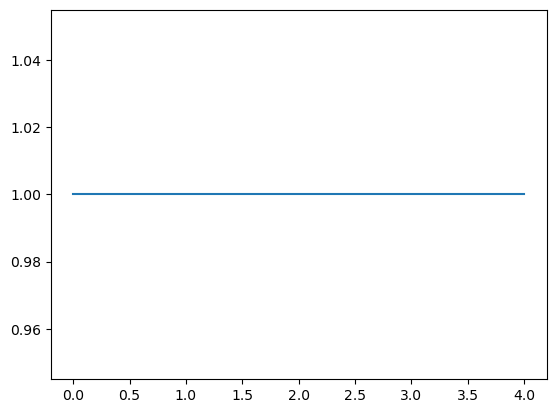

In [22]:
plt.plot(history.test_acc)

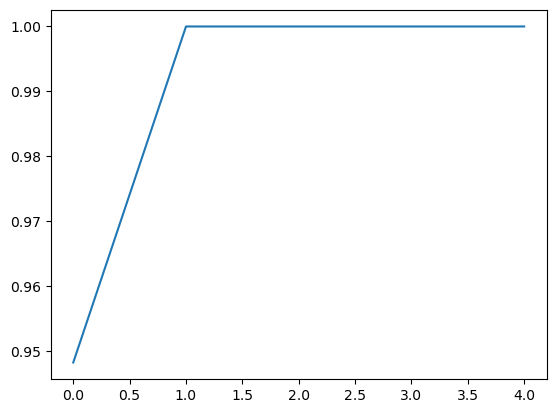

In [23]:
plt.plot(history.train_acc)